In [28]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

** Problem 1 **: 5pts - 4.7

** Problem 2 **: 5pts - 4.10

** Problem 3 **: 10pts - Computer Experiment 4.4.  Reproduce Figure 4.16.

In [91]:
# An iterated map approach to generating the Sierpinski gasket

def s_ifun(xpt):
    av = np.array([0.,0.])
    bv = np.array([.5,np.sqrt(3)/2.])
    cv = np.array([1.,0.])
    trd = 1./3.
    vval = np.random.uniform(0.,1.,1)
    
    if vval <= trd:
        xpt = xpt/2.
    elif trd < vval <= 2.*trd:
        xpt = (bv+xpt)/2.        
    else:
        xpt = (cv+xpt)/2.
    return xpt
    
def sierpinski_gasket_maker(niter):
    xpt = np.array([.5,.25])
    ptlst = np.zeros((1,2))
    for jj in xrange(0,niter):
        xpt = s_ifun(xpt)
        lpt = np.zeros((1,2))
        lpt[0,:] = xpt
        ptlst = np.append(ptlst,lpt,axis=0)
    return ptlst
        
def sierpinski_gasket_box_cnt(niter,bscl):
    ptlst = sierpinski_gasket_maker(niter)
    xvals = ptlst[:,0]
    yvals = ptlst[:,1]
    # Given that we know where the Sierpinski gasket is in space, we can do the box counting in a very efficient way.
    Nbx = int(np.ceil(1./bscl))
    Nby = int(np.ceil(np.sqrt(3)/2.*1./bscl))
    bcnt = 0.
    
    for jj in xrange(1,Nbx):
        
        indsxl = (jj-1)*bscl <= xvals
        indsxr =  xvals < jj*bscl
        indsx = indsxl*indsxr
        
        kk = 1
        yplc = 0.
        crxval = jj*bscl
        
        # Again, we know when to stop in y, so let's make this as efficient as possible.
        if crxval <=.5:
            ymax = np.sqrt(3.)*crxval
        else:
            ymax = np.sqrt(3.)*(1.-crxval)
            
        while yplc <= ymax:
            indsyl = (kk-1)*bscl <= yvals
            indsyr =  yvals < kk*bscl
            indsy = indsyl*indsyr
                
            if np.sum(indsx*indsy)>0:            
                bcnt += 1.
    
            yplc += bscl
            kk += 1                
            
    bcntdim = np.log(bcnt)/np.log(1./bscl)
    plt.scatter(xvals,yvals,s=.1)
    print "Computed box counting dimension is %1.15f:" % bcntdim    
    print "Actual box counting dimension is %1.15f:" % (np.log(3.)/np.log(2.))

Computed box counting dimension is 1.608596321980116:
Actual box counting dimension is 1.584962500721156:


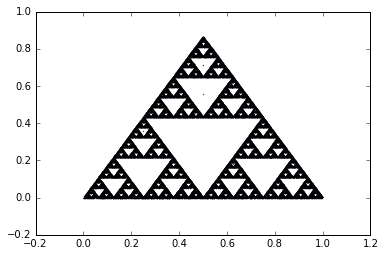

In [93]:
sierpinski_gasket_box_cnt(64000,.002)

** Problem 4 **: 5pts - Given for a measure $m$ that if $\{A_{j}\}_{j=1}^{\infty}$ is a disjoint sequence of sets that 

$$
m\left(\bigcup_{j=1}^{\infty} A_{j} \right) = \sum_{j=1}^{\infty} m(A_{j})
$$

show that if $A \subset B$ then $m(A)\leq m(B)$.  Hint, think of 
$$
B = (A\cap B) \cup (A^{c}\cap B).
$$

** Problem 5 **: 5pts - Show that if $m^{\ast}(A)=0$ that 

$$
m^{\ast}(A\cup B) = m^{\ast}(B).
$$

Hint, prove two inequalities 

$$
m^{\ast}(B) \leq m^{\ast}(A\cup B), ~ m^{\ast}(A\cup B) \leq m^{\ast}(B).
$$